# My question- 
Which career pathway results in a higher expected total income by age 45 — earning a B.S. in Computer Science from CU Boulder or a B.S. in Computer Science from Colorado School of Mines — when considering the combined effects of the number of job promotions received, the number of years spent unemployed, and the number of performance bonuses earned?

# Description- 
I want to determine which career pathway results in a higher expected total income by age 45: earning a B.S. in Computer Science from CU Boulder or a B.S. in Computer Science from Colorado School of Mines. To simulate this, I assume that starting salaries, promotion rates, unemployment periods, and performance bonuses follow realistic ranges based on historical data for each program’s graduates. The random variables I am combining are: the number of job promotions received, the number of years spent unemployed, and the number of performance bonuses earned. One trial of the simulation might involve a CS graduate receiving 3 promotions, being unemployed for 1 year, and earning 4 performance bonuses; the outcome I am measuring is the total income accumulated by age 45. This simulation will allow me to estimate the expected total income for each pathway by accounting for these random career factors.

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


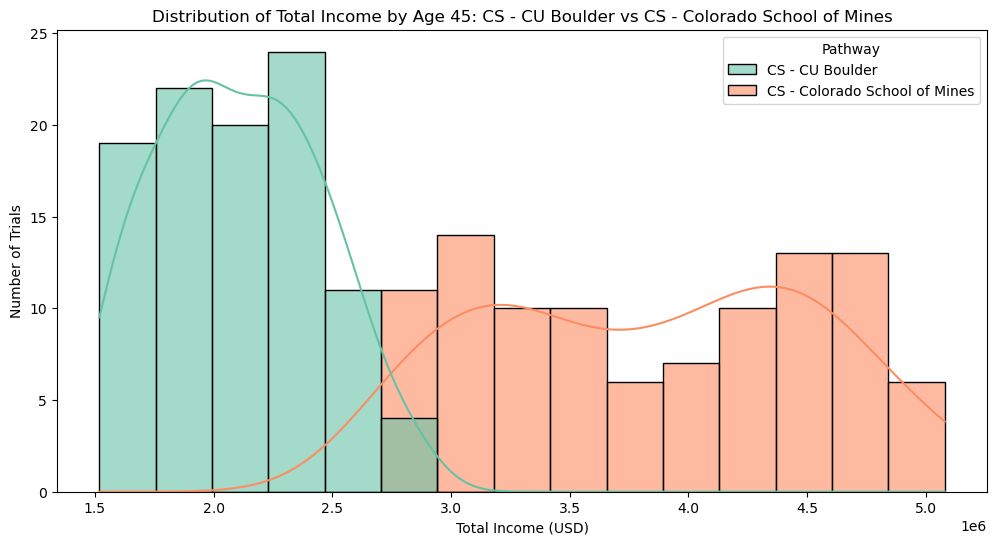

Median Total Income for CS - CU Boulder: 2084449.2250000006
Median Total Income for CS - Colorado School of Mines: 3819505.069500001


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(42)

# Parameters
num_trials = 100
cu_boulder_salary = 75921
mines_salary = 136319
promotion_increase = 0.10
bonus_amount = 5000
promotions_range = (0, 5)
unemployment_range = (0, 3)
bonuses_range = (0, 6)

# Function to simulate total income
def simulate_total_income(start_salary):
    promotions = np.random.randint(promotions_range[0], promotions_range[1]+1)
    unemployment_years = np.random.randint(unemployment_range[0], unemployment_range[1]+1)
    bonuses = np.random.randint(bonuses_range[0], bonuses_range[1]+1)
    
    total_years = 45 - 22
    working_years = total_years - unemployment_years
    final_salary = start_salary * ((1 + promotion_increase) ** promotions)
    income_from_salary = final_salary * working_years
    total_income = income_from_salary + (bonuses * bonus_amount)
    
    return total_income

# Run simulation
cu_incomes = [simulate_total_income(cu_boulder_salary) for _ in range(num_trials)]
mines_incomes = [simulate_total_income(mines_salary) for _ in range(num_trials)]

# Create DataFrame
df = pd.DataFrame({
    'Total Income': cu_incomes + mines_incomes,
    'Pathway': ['CS - CU Boulder']*num_trials + ['CS - Colorado School of Mines']*num_trials
})

# Histogram using Seaborn
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Total Income', hue='Pathway', bins=15, kde=True, palette='Set2', alpha=0.6)
plt.title('Distribution of Total Income by Age 45: CS - CU Boulder vs CS - Colorado School of Mines')
plt.xlabel('Total Income (USD)')
plt.ylabel('Number of Trials')
plt.show()

# Print median for quick comparison
print("Median Total Income for CS - CU Boulder:", np.median(cu_incomes))
print("Median Total Income for CS - Colorado School of Mines:", np.median(mines_incomes))


# My answer- 
Based on the simulation accounting for promotions, unemployment, and performance bonuses, Computer Science graduates from Colorado School of Mines are expected to earn significantly more by age 45 than those from CU Boulder. The simulation shows a median total income of approximately $3,819,505 for Mines graduates, compared to $2,084,449 for CU Boulder graduates. This indicates that, quantitatively, a CS degree from Mines results in a substantially higher expected total income by age 45, with a median difference of roughly $1.73 million, even after accounting for career variability such as promotions, unemployment periods, and performance bonuses.